#Proyecto Final Bedu Módulo 4: Análisis de datos con Python

### Equipo 11:
- Armando Sanchez
- Carlos Briceño
- Fermín Ramírez Ríos
- Gerardo Ascencio
- Marisol Flores Castro
- Miguel Angel Garibay Cocco
***

###Antecedentes
El dataset que tenemos surge a partir los Datos Abiertos de la Dirección General de Epidemiología de la Secretaría de Salud referente al COVID-19 https://www.gob.mx/salud/documentos/datos-abiertos-152127

Se trata de un archivo en formato csv que contiene **3 millones de registros** con fecha de corte al **28 de febrero de 2023**.

Con lo cual se pretende analizar las variables numéricas, sin embargo, la mayoría de las variables son categóricas y el desglose está a nivel de persona, por lo que para los ejercicios de este módulo vamos a obtener subconjuntos con agrupaciones sobre algunas variables para poder realizar los análisis correspondientes.



In [ ]:
#se importan todas las bibliotecas necesarias para todo el proyecto
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/proyectoBedu_python/modulo4/dataset3M_covid2022.csv", low_memory=False)
df = pd.read_csv('/content/drive/MyDrive/dataset3M_covid2022.csv', low_memory=False)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-02-28,0793b8,2,12,9,2,9,9,10,1,2022-05-03,2022-05-03,9999-99-99,97,2,43,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,1,2,7,99,México,97,97
1,2023-02-28,06fce8,1,12,7,1,7,7,59,1,2022-03-05,2022-03-05,9999-99-99,97,2,35,1,98,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97
2,2023-02-28,1933c0,1,12,9,2,9,9,7,1,2022-03-09,2022-03-09,9999-99-99,97,2,27,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97
3,2023-02-28,180725,2,9,9,2,9,9,12,2,2022-01-19,2022-01-17,9999-99-99,2,2,33,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,2
4,2023-02-28,04583b,1,6,5,1,5,5,28,1,2022-06-20,2022-06-17,9999-99-99,97,2,42,1,2,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97


##Análisis Exploratorio de los datos
Del dataset, se observan las variables y se hace un analisis exploratorio de los datos. Tenemos un dataset de 3 millones de registros y 40 columnas

In [ ]:
df.shape

(3000000, 40)

In [ ]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

In [ ]:
df.sample(10)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
747686,2023-02-28,4abfc9,2,4,18,2,15,18,20,1,2022-01-10,2022-01-07,9999-99-99,97,2,27,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,1,3,99,México,97,97
1013736,2023-02-28,6bf94c,2,12,3,1,3,3,3,1,2022-01-21,2022-01-18,9999-99-99,97,2,42,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,1,3,99,México,97,97
816353,2023-02-28,894b85,2,12,27,1,27,27,15,1,2022-01-18,2022-01-15,9999-99-99,97,2,30,1,2,99,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97
2788123,2023-02-28,g1cb8df,1,12,19,2,19,19,46,1,2022-03-22,2022-03-21,9999-99-99,97,2,25,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97
1369681,2023-02-28,6be613,2,12,9,2,9,9,10,1,2022-01-28,2022-01-28,9999-99-99,97,2,54,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,1,99,México,97,97
307751,2023-02-28,b7dc31,2,12,9,1,15,9,12,1,2022-01-11,2022-01-03,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
1432425,2023-02-28,56f19d,1,8,9,2,9,9,12,1,2022-01-29,2022-01-28,9999-99-99,97,2,34,1,97,2,2,2,2,2,2,2,2,2,1,2,1,2,1,1,1,1,3,99,México,97,97
2478433,2023-02-28,gz3bbf4,2,9,9,2,9,9,14,1,2022-02-28,2022-02-27,9999-99-99,97,2,70,1,97,2,2,2,2,2,1,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97
2949018,2023-02-28,g089d05,2,12,9,2,9,9,17,1,2022-04-07,2022-04-07,9999-99-99,97,2,20,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,7,99,México,97,97
1154537,2023-02-28,e7fdf0,2,4,19,1,19,19,25,1,2022-01-07,2022-01-04,9999-99-99,97,2,38,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97


####Actualización de variables
Dado que hay variables categóricas que tienen valor de código entero, se procede a reemplazar los valores por su correpondiente en el catálogo de variables, las que nos interesan para el estudio serán SECTOR, RESULTADO_ANTIGENO Y SEXO.

In [ ]:
df['SECTOR'] = df['SECTOR'].replace(1, 'CRUZ ROJA')
df['SECTOR'] = df['SECTOR'].replace(2, 'DIF')
df['SECTOR'] = df['SECTOR'].replace(3, 'ESTATAL')
df['SECTOR'] = df['SECTOR'].replace(4, 'IMSS')
df['SECTOR'] = df['SECTOR'].replace(5, 'IMSS-BIENESTAR')
df['SECTOR'] = df['SECTOR'].replace(6, 'ISSSTE')
df['SECTOR'] = df['SECTOR'].replace(7, 'MUNICIPAL')
df['SECTOR'] = df['SECTOR'].replace(8, 'PEMEX')
df['SECTOR'] = df['SECTOR'].replace(9, 'PRIVADA')
df['SECTOR'] = df['SECTOR'].replace(10, 'SEDENA')
df['SECTOR'] = df['SECTOR'].replace(11, 'SEMAR')
df['SECTOR'] = df['SECTOR'].replace(12, 'SSA')
df['SECTOR'] = df['SECTOR'].replace(13, 'UNIVERSITARIO')
df['SECTOR'] = df['SECTOR'].replace(99, 'NO ESPECIFICADO')

In [ ]:
df['RESULTADO_ANTIGENO'] = df['RESULTADO_ANTIGENO'].replace(1, 'POSITIVO A SARS-COV-2')
df['RESULTADO_ANTIGENO'] = df['RESULTADO_ANTIGENO'].replace(2, 'NEGATIVO A SARS-COV-2')
df['RESULTADO_ANTIGENO'] = df['RESULTADO_ANTIGENO'].replace(97, 'NO APLICA (CASO SIN MUESTRA)')

In [ ]:
df['SEXO'] = df['SEXO'].replace(1, 'Mujer')
df['SEXO'] = df['SEXO'].replace(2, 'Hombre')

###Extracción de subconjuntos
Se extrae un subconjunto de los datos para calcular los estimados de locación
Para este ejercicio, se toma la variable categórica CLASIFICACION_FINAL para filtrar sólo los **casos confirmados por Covid**, y de los cuales se obtiene el conjunto de edades de los pacientes que estuvieron contagiados, así como otros indicadores como las comorbilidades que padecieron los pacientes por cada entidad

In [ ]:
df_covid = df.query("CLASIFICACION_FINAL==1 | CLASIFICACION_FINAL==2 | CLASIFICACION_FINAL==3")[['FECHA_ACTUALIZACION','ID_REGISTRO','EDAD','SEXO','CLASIFICACION_FINAL','SECTOR','RESULTADO_ANTIGENO','ENTIDAD_UM','ENTIDAD_NAC','ENTIDAD_RES']]
df_covid

,FECHA_ACTUALIZACION,ID_REGISTRO,EDAD,SEXO,CLASIFICACION_FINAL,SECTOR,RESULTADO_ANTIGENO,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES
7,2023-02-28,198b54,58,Hombre,3,SSA,NO APLICA (CASO SIN MUESTRA),5,10,5
15,2023-02-28,045408,34,Mujer,3,SSA,NEGATIVO A SARS-COV-2,22,22,22
20,2023-02-28,1d1a67,24,Mujer,3,SSA,POSITIVO A SARS-COV-2,18,18,18
22,2023-02-28,0741e4,54,Hombre,2,ISSSTE,NO APLICA (CASO SIN MUESTRA),9,9,9
27,2023-02-28,0fef08,39,Hombre,3,SSA,NO APLICA (CASO SIN MUESTRA),9,9,9
...,...,...,...,...,...,...,...,...,...,...
2999995,2023-02-28,g130cc6,27,Hombre,3,IMSS,POSITIVO A SARS-COV-2,21,21,21
2999996,2023-02-28,g171cd3,54,Hombre,3,IMSS,POSITIVO A SARS-COV-2,2,26,2
2999997,2023-02-28,g1dabee,35,Mujer,3,IMSS,POSITIVO A SARS-COV-2,8,8,8
2999998,2023-02-28,g16ef95,25,Hombre,3,IMSS,POSITIVO A SARS-COV-2,20,20,20


Para hacer un constraste de los datos, también obtenemos los valores para los pacientes que no tenían COVID

In [ ]:
df_nocovid = df.query("CLASIFICACION_FINAL==7")[['FECHA_ACTUALIZACION','ID_REGISTRO','EDAD','SEXO','CLASIFICACION_FINAL','SECTOR','RESULTADO_ANTIGENO','ENTIDAD_UM','ENTIDAD_NAC','ENTIDAD_RES']]
df_nocovid

,FECHA_ACTUALIZACION,ID_REGISTRO,EDAD,SEXO,CLASIFICACION_FINAL,SECTOR,RESULTADO_ANTIGENO,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES
0,2023-02-28,0793b8,43,Hombre,7,SSA,NEGATIVO A SARS-COV-2,9,9,9
1,2023-02-28,06fce8,35,Mujer,7,SSA,NEGATIVO A SARS-COV-2,7,7,7
2,2023-02-28,1933c0,27,Hombre,7,SSA,NEGATIVO A SARS-COV-2,9,9,9
3,2023-02-28,180725,33,Hombre,7,PRIVADA,NEGATIVO A SARS-COV-2,9,9,9
4,2023-02-28,04583b,42,Mujer,7,ISSSTE,NEGATIVO A SARS-COV-2,5,5,5
...,...,...,...,...,...,...,...,...,...,...
2999897,2023-02-28,g101eed,54,Mujer,7,SSA,NEGATIVO A SARS-COV-2,15,15,15
2999898,2023-02-28,g19b455,37,Mujer,7,SSA,NEGATIVO A SARS-COV-2,15,15,15
2999899,2023-02-28,g0f3082,28,Hombre,7,SSA,NEGATIVO A SARS-COV-2,2,29,2
2999900,2023-02-28,g0d4a8e,39,Mujer,7,PRIVADA,NEGATIVO A SARS-COV-2,24,24,24


###Generación de variables
Para calcular las medidas de locación, generamos algunas variables como edades, edades de pacientes SIN COVID y edades para mujeres y hombres con COVID

In [ ]:
edades = df_covid['EDAD']
edades_nocovid = df_nocovid['EDAD']
edades_mujeres = df_covid.query("SEXO=='Mujer'")['EDAD']
edades_hombres = df_covid.query("SEXO=='Hombre'")['EDAD']

Obtenemos máximos y mínimos para darnos una idea del rango

In [ ]:
print(f'Valor mínimo de edades de pacientes con COVID: {edades.min()}')
print(f'Valor máximo de edades de pacientes con COVID: {edades.max()}')


Valor mínimo de edades de pacientes con COVID: 0
Valor máximo de edades de pacientes con COVID: 122


In [ ]:
print(f'Valor mínimo de edades de pacientes SIN COVID: {edades_nocovid.min()}')
print(f'Valor máximo de edades de pacientes SIN COVID: {edades_nocovid.max()}')
edades_nocovid.max()

Valor mínimo de edades de pacientes SIN COVID: 0
Valor máximo de edades de pacientes SIN COVID: 122


122

In [ ]:
print(f'Valor mínimo de edades de mujeres con COVID: {edades_mujeres.min()}')
print(f'Valor máximo de edades de mujeres con COVID: {edades_mujeres.max()}')
print(f'Valor mínimo de edades de hombres con COVID: {edades_hombres.min()}')
print(f'Valor máximo de edades de hombres con COVID: {edades_hombres.max()}')

Valor mínimo de edades de mujeres con COVID: 0
Valor máximo de edades de mujeres con COVID: 122
Valor mínimo de edades de hombres con COVID: 0
Valor máximo de edades de hombres con COVID: 122


#Postwork 1: Obteniendo estimados de locación y variabilidad
Vamos a usar estimados de locación y variabilidad para describir nuestro dataset, en este caso, obtenemos el subconjunto de todos los pacientes **confirmados de COVID** y comenzamos por analizar las variables de EDAD y SEXO para obtener las medidas de locación:<br>
a) Promedio <br>
b) Mediana <br>
c) Media Truncada <br>
d) Desviación estándar <br>
e) Rango <br>
f) Percentiles 25 y 75 (por lo menos) <br>
g) Rango intercuartil


###**a) Promedio**
El promedio de las edades de los pacientes con COVID es de 38 años

In [ ]:
print(f'Valor promedio de edades de todos los pacientes con COVID: {edades.mean()}')
print(f'Valor promedio de edades de mujeres con COVID: {edades_mujeres.mean()}')
print(f'Valor promedio de edades de hombres con COVID: {edades_hombres.mean()}')


Valor promedio de edades de todos los pacientes con COVID: 38.26994316490612
Valor promedio de edades de mujeres con COVID: 38.43908399375064
Valor promedio de edades de hombres con COVID: 38.053807482566064


###**b) Mediana**
La mediana de las edades de los pacientes con COVID y de mujeres es de 37, mientras que para los hombres es de 36, lo que indica que podemos tener casos atípicos como la edad de 122 años que indica el máximo

In [ ]:
print(f'La mediana de edades de todos los pacientes con COVID: {edades.median()}')
print(f'La mediana de edades de mujeres con COVID: {edades_mujeres.median()}')
print(f'La mediana de edades de hombres con COVID: {edades_hombres.median()}')

La mediana de edades de todos los pacientes con COVID: 37.0
La mediana de edades de mujeres con COVID: 37.0
La mediana de edades de hombres con COVID: 36.0


###**c)Media Truncada**
Para quitar los valores atípicos, calculamos la media truncada con un 5%, y efectivamente podemos comprobar que el resultado se acerca más a la mediana por lo que existen algunos valores atípicos en la edad de los pacientes, hombres y mujeres

In [ ]:
print(f'La media truncada de edades de todos los pacientes con COVID: {stats.trim_mean(edades, 0.05)}')
print(f'La media truncada de edades de mujeres con COVID: {stats.trim_mean(edades_mujeres, 0.05)}')
print(f'La media truncada de edades de hombres con COVID: {stats.trim_mean(edades_hombres, 0.05)}')

La media truncada de edades de todos los pacientes con COVID: 37.866561178927356
La media truncada de edades de mujeres con COVID: 38.07346592903749
La media truncada de edades de hombres con COVID: 37.598194769937585


###**d) Desviación Estándar**
Obtenenos la desviación estándar para ver qué tan dispersos y alejados están los datos de la media

In [ ]:
print(f'La desviación estándar de edades de todos los pacientes con COVID: {edades.std()}')
print(f'La desviación estándar de edades de mujeres con COVID: {edades_mujeres.std()}')
print(f'La desviación estándar de edades de hombres con COVID: {edades_hombres.std()}')


La desviación estándar de edades de todos los pacientes con COVID: 15.655174323149904
La desviación estándar de edades de mujeres con COVID: 15.12007179295727
La desviación estándar de edades de hombres con COVID: 16.310885624124573


###**e) Rango**
El rango lo obtenemos de la diferencia entre el valor máximo y el mínimo

In [ ]:
print(f'El rango de edades de todos los pacientes con COVID: {edades.max() - edades.min()}')
print(f'El rango de edades de mujeres con COVID: {edades_mujeres.max() - edades_mujeres.min()}')
print(f'El rango de edades de hombres con COVID: {edades_hombres.max() - edades_hombres.min()}')


El rango de edades de todos los pacientes con COVID: 122
El rango de edades de mujeres con COVID: 122
El rango de edades de hombres con COVID: 122


###**f) Percentiles 25 y 75 (por lo menos)**
Obtenemos los percentiles para todos los pacientes y para hombres y mujeres por separado (todos con COVID)

In [ ]:
print("Percentiles para los pacientes con COVID")
print(f'Valor mínimo: {edades.min()}')
print(f'Percentil 10: {edades.quantile(0.1)}')
print(f'Percentil 25: {edades.quantile(0.25)}')
print(f'Percentil 50: {edades.median()}')
print(f'Percentil 75: {edades.quantile(0.75)}')
print(f'Percentil 90: {edades.quantile(0.9)}')
print(f'Valor máximo: {edades.max()}')

Percentiles para los pacientes con COVID
Valor mínimo: 0
Percentil 10: 21.0
Percentil 25: 27.0
Percentil 50: 37.0
Percentil 75: 48.0
Percentil 90: 58.0
Valor máximo: 122


In [ ]:
print("Percentiles para las mujeres con COVID")
print(f'Valor mínimo: {edades_mujeres.min()}')
print(f'Percentil 10: {edades_mujeres.quantile(0.1)}')
print(f'Percentil 25: {edades_mujeres.quantile(0.25)}')
print(f'Percentil 50: {edades_mujeres.median()}')
print(f'Percentil 75: {edades_mujeres.quantile(0.75)}')
print(f'Percentil 90: {edades_mujeres.quantile(0.9)}')
print(f'Valor máximo: {edades_mujeres.max()}')

Percentiles para las mujeres con COVID
Valor mínimo: 0
Percentil 10: 21.0
Percentil 25: 28.0
Percentil 50: 37.0
Percentil 75: 48.0
Percentil 90: 58.0
Valor máximo: 122


In [ ]:
print("Percentiles para los hombres con COVID")
print(f'Valor mínimo: {edades_hombres.min()}')
print(f'Percentil 10: {edades_hombres.quantile(0.1)}')
print(f'Percentil 25: {edades_hombres.quantile(0.25)}')
print(f'Percentil 50: {edades_hombres.median()}')
print(f'Percentil 75: {edades_hombres.quantile(0.75)}')
print(f'Percentil 90: {edades_hombres.quantile(0.9)}')
print(f'Valor máximo: {edades_hombres.max()}')

Percentiles para los hombres con COVID
Valor mínimo: 0
Percentil 10: 20.0
Percentil 25: 27.0
Percentil 50: 36.0
Percentil 75: 49.0
Percentil 90: 59.0
Valor máximo: 122


Viendo estos números podemos inferir varias cosas:

Casi todos los pacientes tienen menos de 60 años.
Eso quiere decir que tenemos algunos valores atípicos demasiado grandes (si los comparamos con el resto de los valores)
La mediana nos estaba dando un número más cercano al verdadero "valor típico" que es el promedio.
El promedio tenía un sesgo hacia arriba debido a los valores grandes.
El rango entre el valor máximo y mínimo no nos da una medida representativa de qué valores pueden tomar nuestros datos.

###**g) Rango Intercuartílico**


In [ ]:
print(f'Rango intercuartílico de todos los pacientes: {edades.quantile(0.75) - edades.quantile(0.25)}')
print(f'Rango intercuartílico de las mujeres: {edades_mujeres.quantile(0.75) - edades_mujeres.quantile(0.25)}')
print(f'Rango intercuartílico de los hombres: {edades_hombres.quantile(0.75) - edades_hombres.quantile(0.25)}')

Rango intercuartílico de todos los pacientes: 21.0
Rango intercuartílico de las mujeres: 20.0
Rango intercuartílico de los hombres: 22.0


#Postwork 2: Introducción a la visualización de datos: Distribuciones
En este postwork vamos a explorar las distribuciones de las variables numéricas que tengamos en nuestro dataset, en nuestro caso nos enfocamos en la edad de todos los pacientes, hombres y mujeres, con COVID

In [ ]:
sns.set(style="whitegrid")

###**BoxPlots**

Obtenemos la gráfica boxplot de las edades de los pacientes con COVID

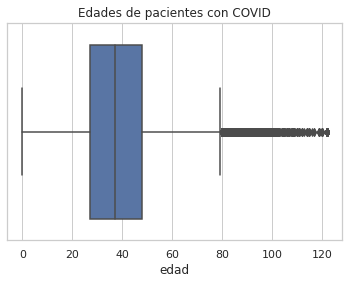

In [ ]:
ax=sns.boxplot(x=edades)
ax.set(title='Edades de pacientes con COVID', xlabel='edad');

Como se puede observar en la gráfica, los datos están concentrados en valores menores a 50 años y que las edades muy altas son anomalías en nuestro conjunto.
Sabemos que, dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

Ahora graficamos las edades de las mujeres con COVID, y observamos el mismo comportamiento que con todos los pacientes, los valores están concentrado en valores menores a 50 años, y las edades muy altas son valores atípicos.

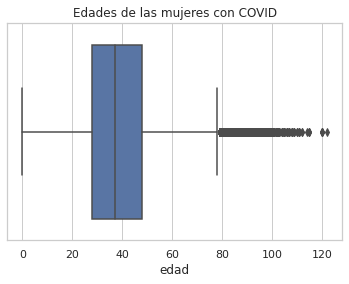

In [ ]:
ax=sns.boxplot(x=edades_mujeres)
ax.set(title='Edades de las mujeres con COVID', xlabel='edad');

Ahora graficamos las edades de los hombres con COVID y obervamos algo similar que el caso con las mujeres, lo datos se concentran en los valores menores a 50 años y existen valores atípicos.

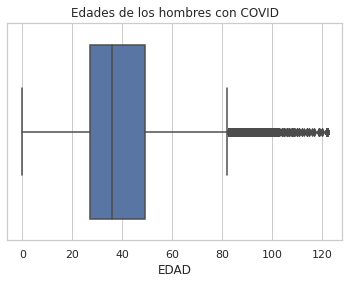

In [ ]:
ax=sns.boxplot(x=edades_hombres)
ax.set(title='Edades de los hombres con COVID');

Ahora graficamos la línea que muestra la mediana en el boxplot y vemos que efectivamente está muy cerca de la media, en las tres variables

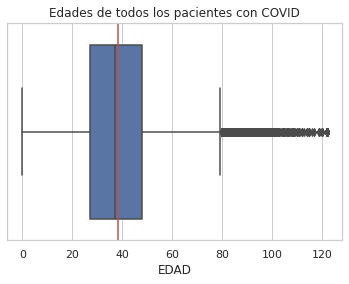

In [ ]:
ax=sns.boxplot(x=edades)
ax.set(title ='Edades de todos los pacientes con COVID')
plt.axvline(edades.mean(), c='r');

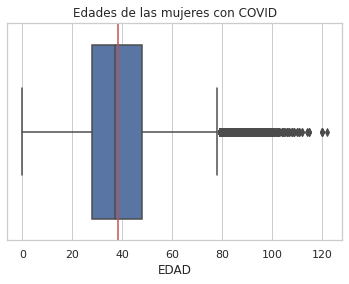

In [ ]:
ax=sns.boxplot(x=edades_mujeres)
ax.set(title ='Edades de las mujeres con COVID')
plt.axvline(edades_mujeres.mean(), c='r');

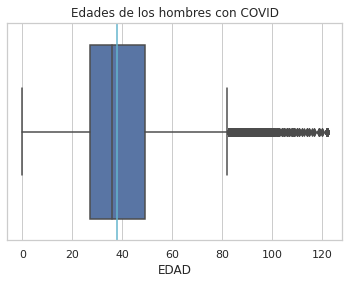

In [ ]:
ax=sns.boxplot(x=edades_hombres)
ax.set(title ='Edades de los hombres con COVID')
plt.axvline(edades_hombres.mean(), c='c');

###**Rango Intercuartílico y valores atípicos**
Vamos a utilizar la medida que utiliza el boxplot para limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite a través del Score de Rango Intercuartílico (IQR-Score). De esa manera estamos filtrando los valores atípicos (consideramos que las edades mayores a 100 son valores atípicos). Mostramos los valores de media, mediana y desviación estándar antes y después.

In [ ]:
print(f'Valor de la media: {edades.mean()}')
print(f'Valor de la mediana: {edades.median()}')
print(f'Valor de la desviación estándar: {edades.std()}')

Valor de la media: 38.26994316490612
Valor de la mediana: 37.0
Valor de la desviación estándar: 15.655174323149904


Calculamos el IQR-score para las edades de todos los pacientes.

In [ ]:
iqr = edades.quantile(0.75) - edades.quantile(0.25)
filtro_inferior = edades > edades.quantile(0.25) - (iqr * 1.5)
filtro_superior = edades < edades.quantile(0.75) + (iqr * 1.5)

df_covid_filtrado = df_covid[filtro_inferior & filtro_superior]

Una vez calculado el IQR-Score, graficamos el boxplot y se observa un rango más real para las edades de los pacientes.

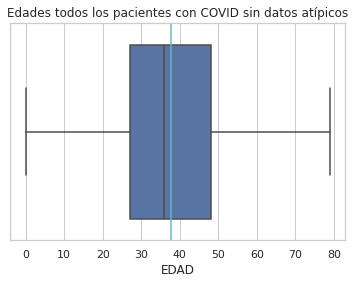

In [ ]:
ax=sns.boxplot(x=df_covid_filtrado['EDAD'])
ax.set(title ='Edades todos los pacientes con COVID sin datos atípicos')
plt.axvline(df_covid_filtrado['EDAD'].mean(), c='c');


In [ ]:
edades2 = df_covid_filtrado['EDAD']

In [ ]:
print("Valores antes del Score del IQR")
print(f'Valor de la media: {edades.mean()}')
print(f'Valor de la mediana: {edades.median()}')
print(f'Valor de la desviación estándar: {edades.std()}')
print("----------------------------")
print("Valores después del Score del IQR")
print(f'Valor de la media: {edades2.mean()}')
print(f'Valor de la mediana: {edades2.median()}')
print(f'Valor de la desviación estándar: {edades2.std()}')

Valores antes del Score del IQR
Valor de la media: 38.26994316490612
Valor de la mediana: 37.0
Valor de la desviación estándar: 15.655174323149904
----------------------------
Valores después del Score del IQR
Valor de la media: 37.6620562265702
Valor de la mediana: 36.0
Valor de la desviación estándar: 14.785844596811353


Con la comparación anterior, se observa que hay un ligero cambio en los valores al eliminar los valores atípicos, se muestra la concentración de los datos entre 25 y 50 años de los pacientes con COVID.

###**Tabla de frecuencias**
Vamos a dividir todas las edades en grupos para saber cuántas muestras tenemos en cada rango y así tenemos otra forma de identificar los valores atípicos. Para este ejercicio, dividimos el total de muestras en 20 intervalos.

In [ ]:
segmentos = pd.cut(edades, 20)
edades.groupby(segmentos).count()

EDAD
(-0.122, 6.1]      23435
(6.1, 12.2]        38971
(12.2, 18.3]       55770
(18.3, 24.4]      178968
(24.4, 30.5]      261882
(30.5, 36.6]      252459
(36.6, 42.7]      220865
(42.7, 48.8]      196001
(48.8, 54.9]      165451
(54.9, 61.0]      123506
(61.0, 67.1]       50019
(67.1, 73.2]       29648
(73.2, 79.3]       18489
(79.3, 85.4]       11683
(85.4, 91.5]        6317
(91.5, 97.6]        2056
(97.6, 103.7]        450
(103.7, 109.8]        96
(109.8, 115.9]        27
(115.9, 122.0]        44
Name: EDAD, dtype: int64

Ahora tenemos una tabla donde los índices son los 20 rangos en los que se dividió nuestro dataset y los valores de la tabla son los conteos de cada agrupación. De esta manera quedan aún en más evidencia los valores atípicos, ya que podemos ver varios segmentos donde la cantidad de muestras es muy baja (edades mayores a 100 años). 

Hacemos el mismo ejercicio para las edades de las mujeres y hombres

Tabla de frecuencia para las mujeres

In [ ]:
segmentos_m = pd.cut(edades_mujeres, 20)
edades_mujeres.groupby(segmentos_m).count()

EDAD
(-0.122, 6.1]      10553
(6.1, 12.2]        18586
(12.2, 18.3]       29218
(18.3, 24.4]       99512
(24.4, 30.5]      145764
(30.5, 36.6]      142273
(36.6, 42.7]      128082
(42.7, 48.8]      115873
(48.8, 54.9]       97580
(54.9, 61.0]       69560
(61.0, 67.1]       27130
(67.1, 73.2]       15083
(73.2, 79.3]        9001
(79.3, 85.4]        5418
(85.4, 91.5]        2986
(91.5, 97.6]         958
(97.6, 103.7]        215
(103.7, 109.8]        44
(109.8, 115.9]        13
(115.9, 122.0]         5
Name: EDAD, dtype: int64

Tabla de frecuencias para los hombres

In [ ]:
segmentos_h = pd.cut(edades_hombres, 20)
edades_hombres.groupby(segmentos_h).count()

EDAD
(-0.122, 6.1]      12882
(6.1, 12.2]        20385
(12.2, 18.3]       26552
(18.3, 24.4]       79456
(24.4, 30.5]      116118
(30.5, 36.6]      110186
(36.6, 42.7]       92783
(42.7, 48.8]       80128
(48.8, 54.9]       67871
(54.9, 61.0]       53946
(61.0, 67.1]       22889
(67.1, 73.2]       14565
(73.2, 79.3]        9488
(79.3, 85.4]        6265
(85.4, 91.5]        3331
(91.5, 97.6]        1098
(97.6, 103.7]        235
(103.7, 109.8]        52
(109.8, 115.9]        14
(115.9, 122.0]        39
Name: EDAD, dtype: int64

###**Histograma**
Ahora mostramos la gráfica de estos datos con un histograma, indicando los 20 segmentos en que dividimos el total de muestras

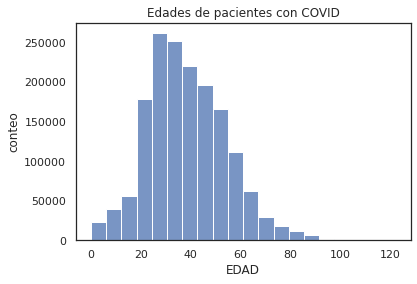

In [ ]:
sns.set(style='white')
#ax = sns.distplot(edades, kde=False, norm_hist=False, bins=20)
ax = sns.histplot(edades, kde=False,bins=20) #sustituye a la función distplot porque dice que ya está deprecada y marca un mensaje grande de warning
ax.set(title='Edades de pacientes con COVID', ylabel='conteo');

Si queremos mayor granularidad en las barras, podemos aumentar el número de bins

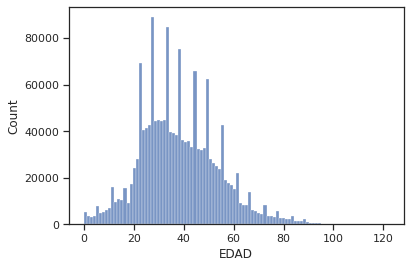

In [ ]:
sns.set(style='ticks')
#sns.distplot(edades, kde=False, norm_hist=False, bins=100)
sns.histplot(edades, kde=False, bins=100);

Ahora graficamos las varibles para hombres y mujeres

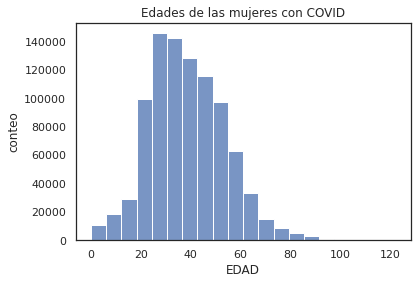

In [ ]:
sns.set(style='white')
ax = sns.histplot(edades_mujeres, kde=False,bins=20)
ax.set(title='Edades de las mujeres con COVID', ylabel='conteo');

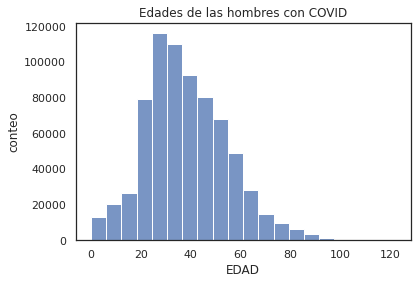

In [ ]:
sns.set(style='white')
ax = sns.histplot(edades_hombres, kde=False,bins=20)
ax.set(title='Edades de las hombres con COVID', ylabel='conteo');

###**Curtosis y asimetría**
Obtenemos estos valores (kurtosis y skew) para describir el histograma 

In [ ]:
print(f'Curtosis de las edades de todos los pacientes: {kurtosis(edades)}')
print(f'Asimetría de las edades de todos los pacientes: {skew(edades)}')

Curtosis de las edades de todos los pacientes: 0.3335072211238277
Asimetría de las edades de todos los pacientes: 0.4481706669880417


Se observa que hay una asimetría positiva, es decir que la cola de la derecha es más larga que la cola de la izquierda. Además la curtosis positiva indica que nuestra distribución está achatada. Esto implica que hay más dispersión de nuestros datos, que están más lejanos de nuestro punto central y que por lo tanto tenemos colas largas (comparadas con la cola normal).


Ahora repetimos el ejercicio para edades de hombres y mujeres, en donde se observa un comportamiento similiar al de todos los pacientes

In [ ]:
print(f'Curtosis de las edades de las  mujeres: {kurtosis(edades_mujeres)}')
print(f'Asimetría de las edades de las mujeres: {skew(edades_mujeres)}')
print("----------------------------------------------------------------------")
print(f'Curtosis de las edades de los hombres: {kurtosis(edades_hombres)}')
print(f'Asimetría de las edades de los hombres: {skew(edades_hombres)}')

Curtosis de las edades de las  mujeres: 0.3256472867345477
Asimetría de las edades de las mujeres: 0.42213010020028036
----------------------------------------------------------------------
Curtosis de las edades de los hombres: 0.311612698708883
Asimetría de las edades de los hombres: 0.4785339369657488


###**Gráficas de densidad**
Vamos a graficar la distribución de densidad de las edades de los pacientes con COVID

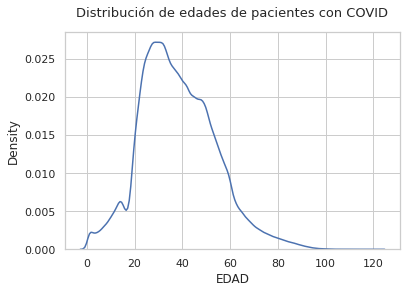

In [ ]:
sns.set(style="whitegrid")
#ax = sns.displot(edades, kind="kde")
ax = sns.kdeplot(edades) #sustituye a la función distplot porque dice que ya está deprecada y marca un mensaje grande de warning
ax.set_title('Distribución de edades de pacientes con COVID', fontsize=13, pad=15);

Ahora mostramos la gráfica de densidad para hombres y mujeres

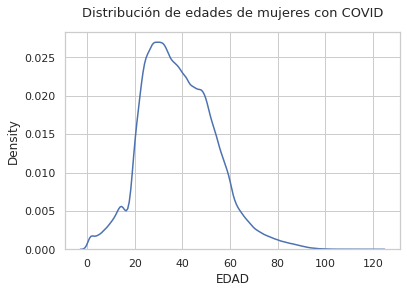

In [ ]:
sns.set(style='whitegrid')
ax = sns.kdeplot(edades_mujeres)
ax.set_title('Distribución de edades de mujeres con COVID', fontsize=13, pad=15);

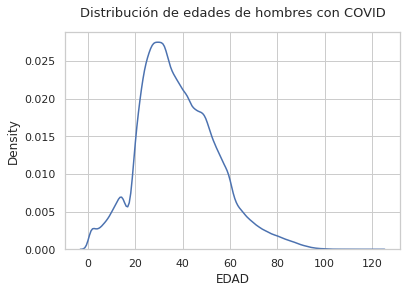

In [ ]:
sns.set(style='whitegrid')
ax = sns.kdeplot(edades_hombres)
ax.set_title('Distribución de edades de hombres con COVID', fontsize=13, pad=15);

Vamos a comparar las edades de los pacientes que tienen COVID contra aquellos que no tienen

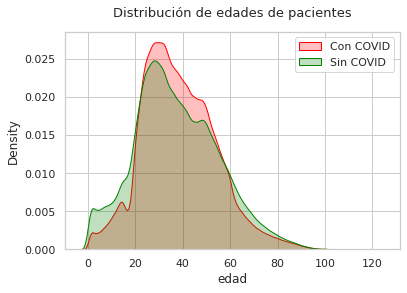

In [ ]:
sns.set(style='whitegrid')
#ax = sns.distplot(edades, hist = False, kde_kws = {'shade': True}, label='COVID')
#sns.distplot(edades_nocovid, hist = False, kde_kws = {'shade': True},label='No COVID')

ax = sns.kdeplot(edades, fill=True, color='red')  #sustituye a la función distplot porque dice que ya está deprecada y marca un mensaje grande de warning
sns.kdeplot(edades_nocovid, fill=True, color='green')
ax.set_title('Distribución de edades de pacientes', fontsize=13, pad=15)
ax.set(xlabel='edad')
plt.legend(labels=["Con COVID","Sin COVID"])
plt.show()
#ax.legend(loc='upper right');


#Postwork 3: Exploración de Variables Categóricas y Análisis Multivariable

###**Gráficas de barras y la moda**

Para las gráficas de barras se usará la variable categorica SECTOR y así observar en qué sectores de salud hay más pacientes con COVID

In [ ]:
sectores = pd.DataFrame(df_covid['SECTOR'].value_counts())
sectores

,SECTOR
IMSS,932358
SSA,546924
PRIVADA,81816
ISSSTE,35541
ESTATAL,14537
PEMEX,9496
IMSS-BIENESTAR,7217
MUNICIPAL,2324
SEDENA,2073
SEMAR,1866


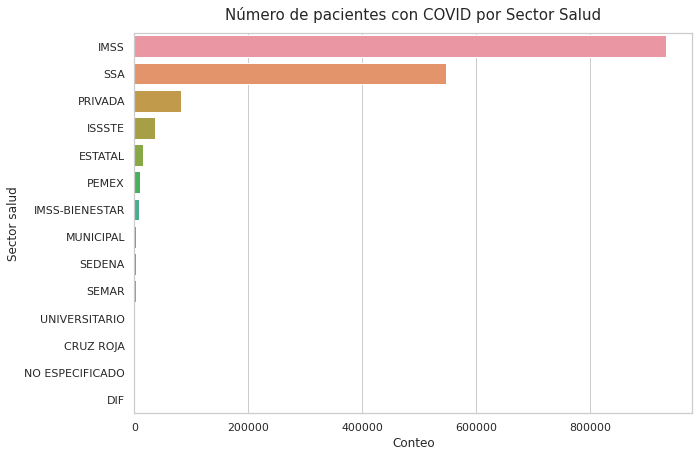

In [ ]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(10, 7))
ax = sns.barplot(sectores, x='SECTOR', y=sectores.index, orient='h')
ax.set_title('Número de pacientes con COVID por Sector Salud',fontsize=15,pad=13)
ax.set(ylabel='Sector salud');
ax.set(xlabel='Conteo');

In [ ]:
as_percentages = sectores * 100 / sectores.sum()

In [ ]:
as_percentages

,SECTOR
IMSS,56.985326
SSA,33.427763
PRIVADA,5.000559
ISSSTE,2.172251
ESTATAL,0.888495
PEMEX,0.580391
IMSS-BIENESTAR,0.441100
MUNICIPAL,0.142042
SEDENA,0.126701
SEMAR,0.114049


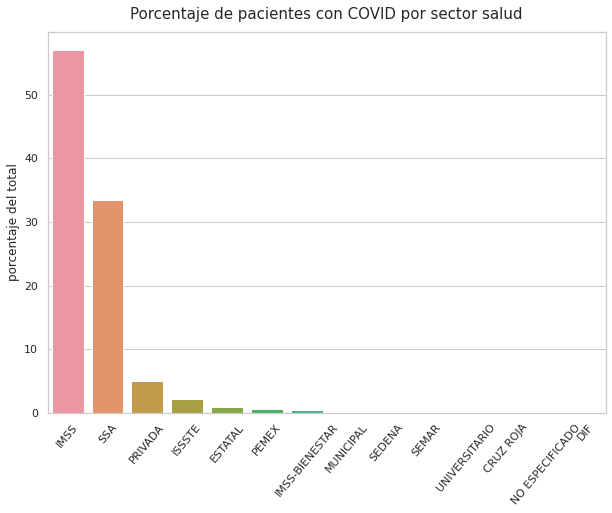

In [ ]:
fig = plt.figure(figsize=(10, 7))
as_percentages = sectores * 100 / sectores.sum()
ax = sns.barplot(as_percentages,x=as_percentages.index, y='SECTOR')
ax.set_title('Porcentaje de pacientes con COVID por sector salud',fontsize=15,pad=13)
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);


En las gráficas se puede observar que el sector que tiene más pacientes con COVID es el IMSS, lo cual representa a la **MODA** ya que es el valor que más se repite, pero también se puede obtener mediante la función **mode()**

In [ ]:
df_covid['SECTOR'].mode()

0    IMSS
Name: SECTOR, dtype: object

Se analiza otra variable categorica RESULTADO, para observar del total de pacientes, cuántos tienen COVID y cuántos no.

In [ ]:
diagnostico = pd.DataFrame(df['RESULTADO_ANTIGENO'].value_counts())
#diagnostico = df['RESULTADO_ANTIGENO']
diagnostico

,RESULTADO_ANTIGENO
POSITIVO A SARS-COV-2,1424175
NEGATIVO A SARS-COV-2,1206115
NO APLICA (CASO SIN MUESTRA),369710


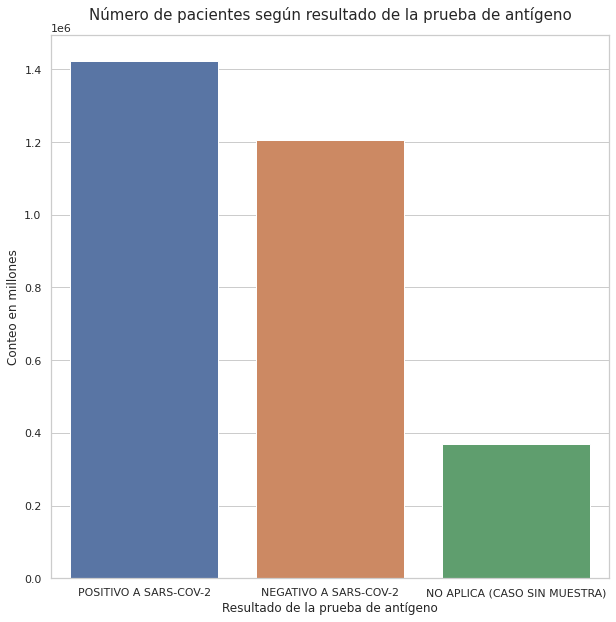

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = sns.barplot(diagnostico, x=diagnostico.index,y='RESULTADO_ANTIGENO')
ax.set_title('Número de pacientes según resultado de la prueba de antígeno', fontsize=15, pad=15)
ax.set(ylabel='Conteo en millones')
ax.set(xlabel='Resultado de la prueba de antígeno');

###**Tablas de contigencia**
Para este ejercicio tomaremos el resultado de la prueba de antígeno y el sexo de los pacientes registrados

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], df['SEXO'],margins=True, margins_name='Total')

SEXO,Hombre,Mujer,Total
RESULTADO_ANTIGENO,,,
NEGATIVO A SARS-COV-2,533640,672475,1206115
NO APLICA (CASO SIN MUESTRA),165843,203867,369710
POSITIVO A SARS-COV-2,624184,799991,1424175
Total,1323667,1676333,3000000


En esta tabla se muestra la relación entre las mujeres y hombres con tabaquismo según el resultado de la prueba de antígeno 

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['TABAQUISMO']],margins=True, margins_name='Total')

SEXO                         Hombre                 Mujer                 \
TABAQUISMO                        1        2    98      1        2    98   
RESULTADO_ANTIGENO                                                         
NEGATIVO A SARS-COV-2         33459   498715  1466  21889   649081  1505   
NO APLICA (CASO SIN MUESTRA)   9213   155890   740   5871   197411   585   
POSITIVO A SARS-COV-2         36714   584865  2605  23974   773492  2525   
Total                         79386  1239470  4811  51734  1619984  4615   

SEXO                            Total  
TABAQUISMO                             
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relación entre hombres y mujeres con **obesidad** según el resultado de prueba de antígeno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['OBESIDAD']],margins=True, margins_name='Total')

SEXO                         Hombre                  Mujer                 \
OBESIDAD                          1        2    98       1        2    98   
RESULTADO_ANTIGENO                                                          
NEGATIVO A SARS-COV-2         24519   507791  1330   39152   631947  1376   
NO APLICA (CASO SIN MUESTRA)   9502   155624   717   13723   189582   562   
POSITIVO A SARS-COV-2         39274   582573  2337   57449   740256  2286   
Total                         73295  1245988  4384  110324  1561785  4224   

SEXO                            Total  
OBESIDAD                               
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relación entre hombres y mujeres con **hipertensión** según el resultado de prueba de antígeno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['HIPERTENSION']],margins=True, margins_name='Total')

SEXO                          Hombre                  Mujer                 \
HIPERTENSION                       1        2    98       1        2    98   
RESULTADO_ANTIGENO                                                           
NEGATIVO A SARS-COV-2          39167   493002  1471   56592   614381  1502   
NO APLICA (CASO SIN MUESTRA)   16565   148550   728   20915   182372   580   
POSITIVO A SARS-COV-2          50952   570652  2580   68723   728751  2517   
Total                         106684  1212204  4779  146230  1525504  4599   

SEXO                            Total  
HIPERTENSION                           
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relación entre hombres y mujeres con **diabetes** según el resultado de prueba de antígeno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['DIABETES']],margins=True, margins_name='Total')

SEXO                         Hombre                  Mujer                 \
DIABETES                          1        2    98       1        2    98   
RESULTADO_ANTIGENO                                                          
NEGATIVO A SARS-COV-2         29854   502271  1515   41263   629621  1591   
NO APLICA (CASO SIN MUESTRA)  12206   152871   766   14451   188781   635   
POSITIVO A SARS-COV-2         34392   587132  2660   46374   751024  2593   
Total                         76452  1242274  4941  102088  1569426  4819   

SEXO                            Total  
DIABETES                               
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relación en 2 niveles entre hombres y mujeres con **obesidad y diabetes** según el resultado de prueba de antígeno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['DIABETES'],df['OBESIDAD']],margins=True, margins_name='Total')

SEXO                         Hombre                                            \
DIABETES                          1                 2                 98        
OBESIDAD                          1      2  98      1        2   98    1    2   
RESULTADO_ANTIGENO                                                              
NEGATIVO A SARS-COV-2          4139  25699  16  20269   481927   75  111  165   
NO APLICA (CASO SIN MUESTRA)   1863  10336   7   7618   145214   39   21   74   
POSITIVO A SARS-COV-2          5823  28553  16  33227   553861   44  224  159   
Total                         11825  64588  39  61114  1181002  158  356  398   

SEXO                                Mujer                                  \
DIABETES                                1                 2                 
OBESIDAD                        98      1      2  98      1        2   98   
RESULTADO_ANTIGENO                                                          
NEGATIVO A SARS-COV-2         1239   7934  33317  12  31088   598436   97   
NO APLICA (CASO SIN MUESTRA)   671   2813  11629   9  10890   177859   32   
POSITIVO A SARS-COV-2         2277   9725  36635  14  47490   703458   76   
Total                         4187  20472  81581  35  89468  1479753  205   

SEXO                                            Total  
DIABETES                       98                      
OBESIDAD                        1    2    98           
RESULTADO_ANTIGENO                                     
NEGATIVO A SARS-COV-2         130  194  1267  1206115  
NO APLICA (CASO SIN MUESTRA)   20   94   521   369710  
POSITIVO A SARS-COV-2         234  163  2196  1424175  
Total                         384  451  3984  3000000

En esta tabla de contingencia se observa la relación entre hombres y mujeres con **diabetes**.

In [ ]:
pd.crosstab(df['DIABETES'], df['SEXO'],margins=True, margins_name='Total')

SEXO,Hombre,Mujer,Total
DIABETES,,,
1,76452,102088,178540
2,1242274,1569426,2811700
98,4941,4819,9760
Total,1323667,1676333,3000000


###**Graficando con múltiples axis**
Para este ejercicio tomaremos el resultado de la prueba de antígeno y el sexo de los pacientes registrados

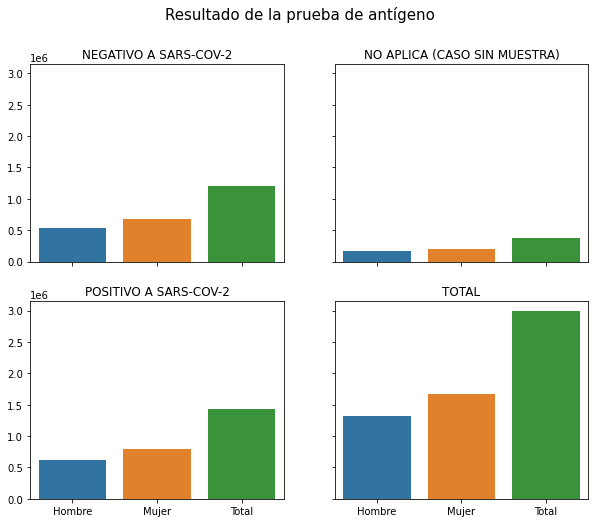

In [ ]:
crosstab = pd.crosstab(df['RESULTADO_ANTIGENO'], df['SEXO'],margins=True, margins_name='Total')
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
sns.barplot(pd.DataFrame(crosstab.iloc[0]), x=crosstab.iloc[0].index, y='NEGATIVO A SARS-COV-2', ax=axes[0, 0])
sns.barplot(pd.DataFrame(crosstab.iloc[1]), x=crosstab.iloc[1].index, y='NO APLICA (CASO SIN MUESTRA)', ax=axes[0, 1])
sns.barplot(pd.DataFrame(crosstab.iloc[2]), x=crosstab.iloc[2].index, y='POSITIVO A SARS-COV-2', ax=axes[1, 0])
sns.barplot(pd.DataFrame(crosstab.iloc[3]), x=crosstab.iloc[3].index, y='Total', ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='NEGATIVO A SARS-COV-2')
axes[0, 1].set(xlabel='', ylabel='', title='NO APLICA (CASO SIN MUESTRA)')
axes[1, 0].set(xlabel='', ylabel='', title='POSITIVO A SARS-COV-2')
axes[1, 1].set(xlabel='', ylabel='', title='TOTAL')

fig.suptitle('Resultado de la prueba de antígeno', fontsize=15);

En las multigráficas se observa la diferencia de todos los resultados de antígeno, se puede ver que del total de muestras la cantidad es similar tanto para los hombres como para las mujeres y son pocos en donde no existe una muestra de antígeno

###Boxplots y Violins


Se grafican boxplots donde se combinan una variable numérica EDAD con una variable categórica SEXO en la misma figura, que es lo que habíamos obtenido en el postwork 2 en gráficas separadas. Aquí se muestra claramente la ligera diferencia entre las mujeres y hombres con COVID

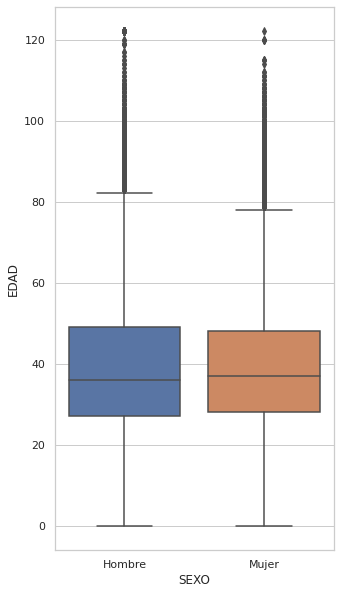

In [ ]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=df_covid, x='SEXO', y='EDAD');

###Violinplots
Un violinplot es muy parecido a un boxplot, con la diferencia que en vez de graficar frecuencias grafica estimados de densidad, por lo que podemos interpretarlo como un boxplot mezclado con una gráfica de densidad. Aquí es mucho más fácil ver ciertos detalles en la distribución de los datos que no es posible ver en los boxplots pero es mucho más difícil ver los valores atípicos y dónde se encuentran ubicados.

Ahora observamos los violinplots para las edades por sexo en donde la 'pildorita' negra en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana.

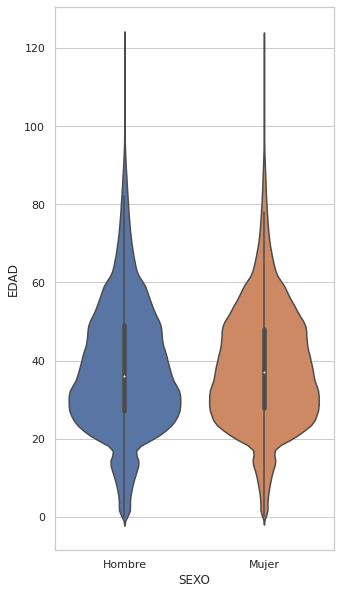

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=df_covid, x='SEXO', y='EDAD');

#Postwork 4: Correlaciones y Regresión Lineal Simple
En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Dado que nuestro dataset sólo tiene variables categóricas, vamos a construir subdatasets del mismo haciendo agrupaciones por algunas variables y tomando como índice de los datos las edades de los pacientes, de esta manera tendremos valores que indiquen cuántos pacientes tienen alguna comorbilidad según su edad.

Primero filtramos nuestro dataFrame para obtener solo pacientes positivos a covid, y que hayan presentado alguna comorbilidad.

In [ ]:
comorbilidades = ['DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'CARDIOVASCULAR'\
                  ,'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']

filtro = 'RESULTADO_LAB==1 & (DIABETES == 1 or EPOC == 1 or ASMA == 1 or ' + \
          'HIPERTENSION == 1 or CARDIOVASCULAR == 1 or OBESIDAD == 1 or ' + \
          'RENAL_CRONICA == 1 or TABAQUISMO == 1)'

df_positivos = pd.DataFrame(df.query(filtro))

Posteriormente contabilizamos las comorbilidades y las agrupamos

In [ ]:
df_con_comorbilidades = df_positivos[comorbilidades].groupby(comorbilidades).sum().reset_index()
df_con_comorbilidades.head()

,DIABETES,EPOC,ASMA,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,98
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2


###**Matriz de correlaciones y mapas de calor**

En una matriz podríamos ver mejor las correlaciones.


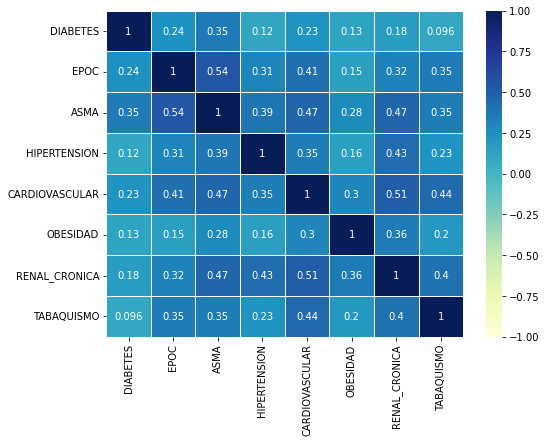

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_con_comorbilidades.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

###**Pairplots**

Y en un pairplot también quedan evidentes las claras correlaciones entre comorbilidades

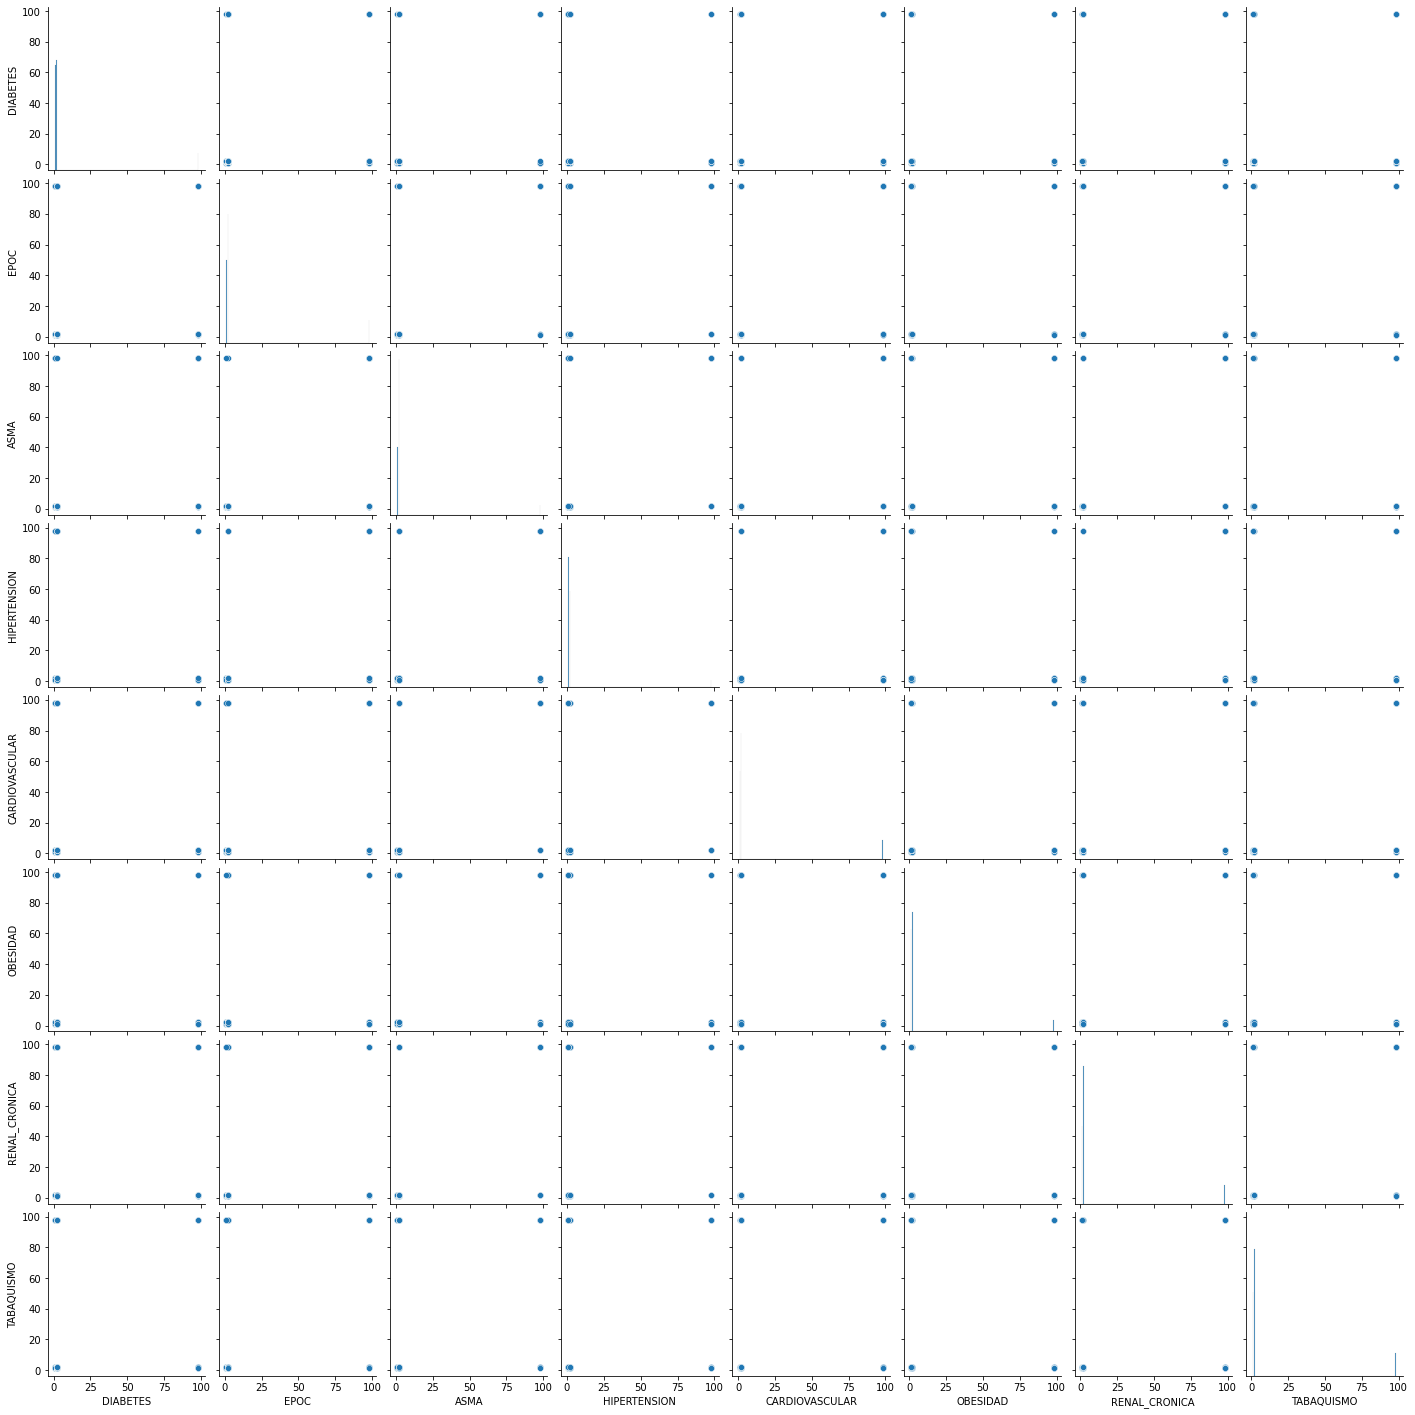

In [ ]:
sns.pairplot(df_con_comorbilidades)

###**Regresión Lineal Simple**
Para demostrar una regresión lineal trabajaremos con las variables de comorbilidad CARDIOVASCULAR y RENAL_CRONICA (que muestran tener la más alta correlación)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
serie_1 = df_con_comorbilidades['CARDIOVASCULAR']
serie_2 = df_con_comorbilidades['RENAL_CRONICA']
lr = LinearRegression()

lr.fit(serie_1.to_frame(), serie_2)

y_predict = lr.predict(serie_1.to_frame())

Graficamos los Y originales y los Y predichos

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


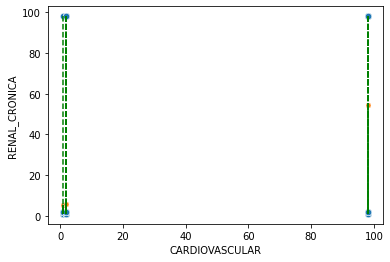

In [ ]:
sns.scatterplot(serie_1, serie_2, s = 40)
sns.scatterplot(serie_1, y_predict, s = 25)

for i in range(len(serie_1)):
    plt.plot([serie_1[i], serie_1[i]], [serie_2[i], y_predict[i]], 'g--')

Extrayendo la ecuación de la línea del modelo entrenado

In [ ]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

Y la función predictiva queda como sigue.

In [ ]:
print(f'y = {coefficient} * x + {intercept}')

y = 0.507265577352529 * x + 4.643902132434072


#Postwork 5: Distribuciones muestrales y técnicas de evaluación de modelos
Vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas.


###Bootstrap
#### La distribución, su asimetría y curtosis

Utilizamos el algoritmo de Bootstrap para revisar qué tanto podemos confiar en nuestra medida estadística de edad.

Detectamos que la distribución muestral de la media en las edades es bastante normal en forma.

In [ ]:
df_covid_filtrado_pw5 = df_covid_filtrado.copy()
df_covid_filtrado_pw5['EDAD'].sample(frac=0.1, replace=True)

1924431    33
2347102    36
734698     73
1659897    63
1344554    34
           ..
950602     41
2305310    47
987091     32
927180     40
1703471    26
Name: EDAD, Length: 161546, dtype: int64

In [ ]:
means = []
medians = []
edad_pw5 = df_covid_filtrado_pw5['EDAD']

for i in range(100_000):
    sample = edad_pw5.sample(n=50, replace=True)
    means.append(sample.mean())
    medians.append(sample.median())
    
serie_means = pd.Series(means)
serie_medians = pd.Series(medians)

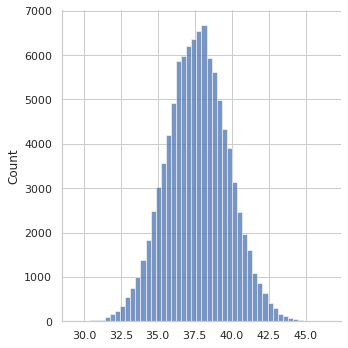

In [ ]:
sns.set(style='whitegrid')
sns.displot(serie_means,bins=50); #sustituye a la función distplot porque dice que ya está deprecada y marca un mensaje grande de warning
#sns.distplot(serie_means, kde=False, norm_hist=False);

Si revisamos la distribución de nuestra mediana, detectamos que también presenta una forma normal, los picos en la distribución se encuentran en el mismo lugar que nuestro histograma de medias.

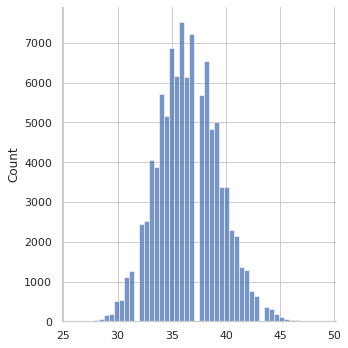

In [ ]:
sns.displot(serie_medians, kde=False, bins=50);

Obtenemos la asimetría y curtosis de las series de Medias y Medianas.

In [ ]:
asimetria_medias = serie_means.skew()
asimetria_medianas = serie_medians.skew()
curtosis_medias= serie_means.kurtosis()
curtosis_medianas = serie_medians.kurtosis()

print(f"Asimetría de Media:\t{asimetria_medias}")
print(f"Asimetría de Medianas:\t{asimetria_medianas}")
print(f"Curtosis de Medias:\t{curtosis_medias}")
print(f"Curtosis de Medianas:\t{curtosis_medianas}")

Asimetría de Media:	0.02782359631075524
Asimetría de Medianas:	0.174681348400407
Curtosis de Medias:	-0.009779193297313249
Curtosis de Medianas:	-0.05749210001416882


###**Error Estandar**

El error estándar nos dice qué tan dispersas están nuestras medidas estadísticas.

Los intervalos de confianza son una manera de mostrar la incertidumbre.

In [ ]:
print(f'Error estandar: {serie_means.std()}')
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Error estandar: 2.088277466735975
Valor mínimo: 29.36
Valor máximo: 46.56
Rango: 17.200000000000003


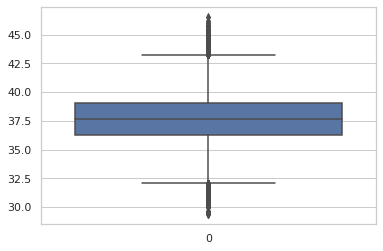

In [ ]:
sns.boxplot(serie_means);

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

Podemos escribir nuestro intervalo de confianza de dos maneras distintas:

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {edad_pw5.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 33.6 < 37.6620562265702 < 41.82


In [ ]:
mean_of_intervals = ((edad_pw5.mean() - limite_inferior) + (limite_superior - edad_pw5.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {edad_pw5.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 37.6620562265702 +/- 4.109999999999999


Podemos visualizar estos límites también:

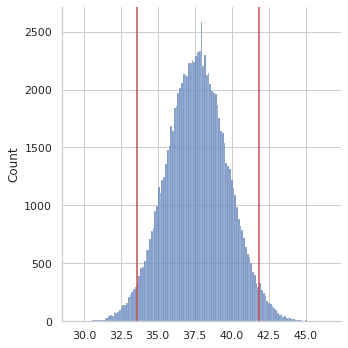

In [ ]:
#sns.distplot(serie_means, kde=False, norm_hist=False)
sns.displot(serie_means, kde=False)
plt.axvline(limite_inferior, c= 'r')
plt.axvline(limite_superior, c = 'r');

###**Técnicas de evaluación de modelos**
####Regresión Linear Múltiple

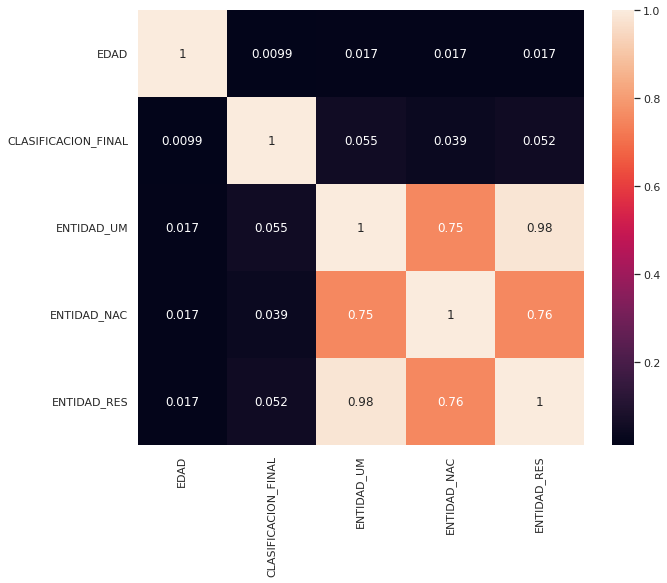

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_covid_filtrado.corr(), annot=True);

Dividimos nuestro dataset en dos para intentar predecir la clasificación final según las variables EDAD y ENTIDAD_NAC.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_covid_filtrado[['EDAD', 'ENTIDAD_NAC']]
y = df_covid_filtrado['CLASIFICACION_FINAL']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)
lr.score(X_test, y_test)

0.0016087007174950818

Nuestro resultado es menor que los coeficientes de correlación que tienen las variables.

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)
lr_2.score(X, y)

0.0016252025075130794

###**Validación cruzada**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_validate(lr, X, y, scoring='r2')
scores

{'fit_time': array([0.50804067, 0.45805073, 0.35893083, 0.41598248, 0.39719129]),
 'score_time': array([0.02377105, 0.01554155, 0.02448082, 0.02899671, 0.05339646]),
 'test_score': array([-1.32305287e-03,  2.58806087e-05,  7.84220503e-04,  1.57520029e-03,
        -2.67306556e-03])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -0.000 +/- 0.002


# Postwork 6: Visualización de datos avanzada

Para la visualización avanzada estamos usando mapas coropléticos, los cuales con el sombreado, tintes o proporciones pueden mostrarnos las diferencias relativas que van del sombreado claro (los de baja densidad) hasta el sombreado oscuro (donde reside la mayor densidad).

Creamos este mapa, usando un archivo de JSON con los datos geográficos de los estados de México y cruzándolos con un archivo CSV el cuál contiene el nombre de los estados de México y el número de casos confirmados por cada uno de ellos. 

Teniendo estos archivos, usamos la biblioteca de visualización Folium para la creación de mapas interactivos, y le agregamos un puntero, el cuál cuando hacemos un *hover* sobre cada uno de ellos nos muestra su nombre y el número de casos confirmados.

En el desarrollo se tomó el archivo JSON y se recorrieron las propiedades, usando del CSV, las propiedades **estado** y **conteo**, después creamos una versión indexada del dataframe para poder buscar los valores, usando como index el valor **estado**, posteriormente se recorre el archivo de las geopropiedades, y se toma la propiedad **name**, se le agrega la propiedad **conteo**; para finalizar se agrega esto a un *tootlip*, y se pone como un layer a nuestro mapa.

###**Mapa coroplético**

In [ ]:
import folium

state_geo = f'/content/drive/MyDrive/proyectoBedu_python/modulo4/Remoto mexico.json'
state_data = pd.read_csv('/content/drive/MyDrive/proyectoBedu_python/modulo4/casos.csv', index_col=0)

m = folium.Map(location=[24, -104], zoom_start=5, width='60%', height='60%')

cp = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=["estado", "conteo"],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,   
    legend_name='Número de casos'
).add_to(m)

state_data_indexed = state_data.set_index('estado')
  
for s in cp.geojson.data['features']:
  name = s["properties"]["name"]
  if name in state_data_indexed.index:
    s['properties']['conteo'] = int(state_data_indexed.loc[name, 'conteo'])
  else:
    s['properties']['conteo'] = 0
  #print(s["properties"]["name"] + " - " + str(s["properties"]["conteo"]))

folium.GeoJsonTooltip(['name', 'conteo']).add_to(cp.geojson)
  
folium.LayerControl().add_to(m)
 
m

 - 0
Baja California - 81937
Baja California Sur - 63333
Coahuila - 82682
Chihuahua - 88401
Durango - 29820
Sinaloa - 105094
Sonora - 77280
Zacatecas - 39287
Nuevo León - 207155
San Luis Potosí - 141224
Tamaulipas - 76443
Aguascalientes - 50802
Colima - 37379
Jalisco - 127823
Michoacán - 42379
Nayarit - 41337
Campeche - 19735
Oaxaca - 73023
Puebla - 94178
Tabasco - 77218
Tlaxcala - 30894
Ciudad de México - 837851
Guanajuato - 162336
Guerrero - 41417
Hidalgo - 63972
México - 315727
Morelos - 48438
Querétaro - 84594
Veracruz - 109931
Chiapas - 33779
Quintana Roo - 55281
Yucatán - 66131


###Gráfica de barras apiladas
Para este ejercicio tomamos los valores de la tabla de contingencia de la prueba de antígeno por sexo

In [ ]:
value_counts = pd.crosstab(df['RESULTADO_ANTIGENO'], df['SEXO'],margins=True, margins_name='Total')
value_counts

SEXO,Hombre,Mujer,Total
RESULTADO_ANTIGENO,,,
NEGATIVO A SARS-COV-2,533640,672475,1206115
NO APLICA (CASO SIN MUESTRA),165843,203867,369710
POSITIVO A SARS-COV-2,624184,799991,1424175
Total,1323667,1676333,3000000


Y generamos una gráfica de barras apiladas para ver el contraste del número de hombres contra el de mujeres en los resultados de la prueba de antígeno, y observamos que hay más mujeres que hombres en el registro de la base de datos y que también hay más mujeres con covid que hombres.

<ipython-input-118-6764b2a120a3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


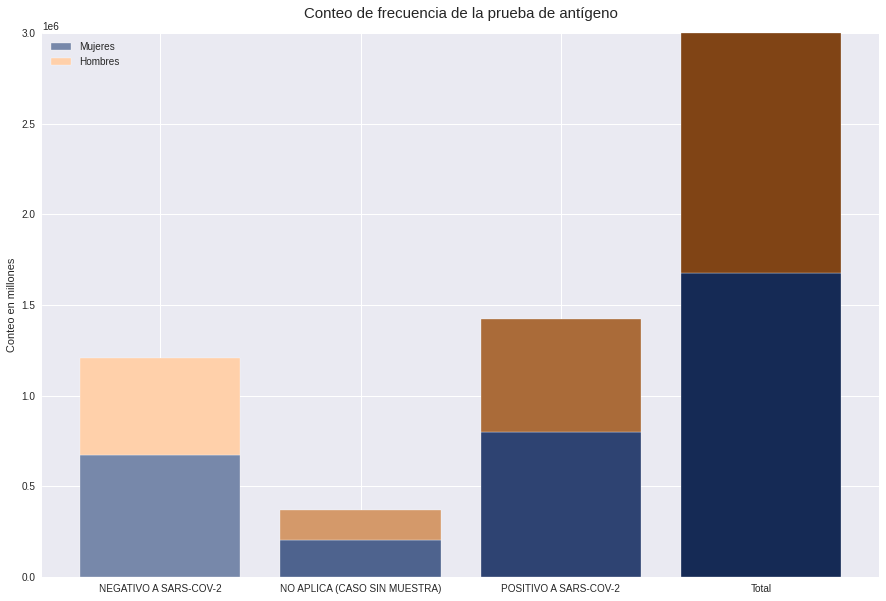

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['Mujer'], label='Mujer',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(value_counts.index, value_counts['Hombre'], bottom=value_counts['Mujer'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('Conteo en millones')
ax.set_title('Conteo de frecuencia de la prueba de antígeno', fontsize=15, pad=15);
plt.legend((plt1[0], plt2[0]), ('Mujeres', 'Hombres'));
ax.set_ylim(0, 3000000);

#Postwork 7: Pruebas A/B y Procesamiento de Lenguaje Natural
Dado que el DataSet con el que estamos trabajando del COVID no trae información estructurada, nos dimos a la tarea de buscar otro DataSet que nos ayude con este postwork. Dando continuidad al mismo tema se encontró un dataset relacionado con las vacunas del COVID el cual nos ayudará con el tema de Procesamiento de lenguaje natural.<br>
Este DataSet se encontro en el siguiente link: https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets

In [ ]:
#se importan todas las bibliotecas necesarias
import nltk
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/proyectoBedu_python/modulo4/vaccination_all_tweets.csv", low_memory=False)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Dentro de análisis exploratorio de los datos, hemos identificado diferentes entradas de los tweets, por ello se ha agrupado por el "source". En el campo "text" tenemos los diferentes comentarios que los usuarios han expresado unos muy interesantes y otros no tanto.

In [ ]:
grouped_by_title = df.groupby('source')['text'].max()
grouped_by_title

source
 Xinhua Sports     Brazilian football club Atletico Mineiro will ...
24liveblog         Second shipment of #PfizerbioNTech #coronaviru...
24sante            Fast &amp; Furious 8 : tensions entre Dwayne J...
50trends Russia    [ TTs RU🇷🇺 05:50 ]\n#SputnikV has entered the ...
92 News HD         Special plane carrying one million doses of Si...
                                         ...                        
vikaslatyan        #COVIDVACCINE ALERT: Sat May 29 20:07:38 2021 ...
xh_scitech         Sri Lanka's study finds #Sinopharm #COVID19 va...
zzposts            Protection from its vaccine still strong 6 mon...
Оwly               So far I'm just tired. Could be from the heat ...
🦉TeleTweet         Thanks to one of the peeps for Erin RN's page ...
Name: text, Length: 379, dtype: object

Para poder continuar vamos a darle un limpieza a los datos

In [ ]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.replace(r'<br\s*/?>', ' ', regex=True)
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

<ipython-input-78-5efbb59ac0d5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-78-5efbb59ac0d5>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-78-5efbb59ac0d5>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


source
 Xinhua Sports     brazilian football club atletico mineiro will ...
24liveblog         second shipment of pfizerbiontech coronavirus ...
24sante            fast amp furious   tensions entre dwayne johns...
50trends Russia     tts ru  sputnikv has entered the top trends g...
92 News HD         special plane carrying one million doses of si...
                                         ...                        
vikaslatyan        covidvaccine alert sat may    avlb on  center ...
xh_scitech         sri lankas study finds sinopharm covid vaccine...
zzposts            protection from its vaccine still strong  mont...
Оwly               so far im just tired could be from the heat or...
🦉TeleTweet         thanks to one of the peeps for erin rns page l...
Name: text, Length: 379, dtype: object

Ahora, vamos a construir un objeto Text con nuestros datos.

In [ ]:
# Con esto separaremos cada oracion en palabras
tokenized = grouped_by_title.apply(nltk.word_tokenize)
print(tokenized)

# Generamos nuestro objecto text

all_words = tokenized.sum()
text = nltk.Text(all_words)

print(text)

source
 Xinhua Sports     [brazilian, football, club, atletico, mineiro,...
24liveblog         [second, shipment, of, pfizerbiontech, coronav...
24sante            [fast, amp, furious, tensions, entre, dwayne, ...
50trends Russia    [tts, ru, sputnikv, has, entered, the, top, tr...
92 News HD         [special, plane, carrying, one, million, doses...
                                         ...                        
vikaslatyan        [covidvaccine, alert, sat, may, avlb, on, cent...
xh_scitech         [sri, lankas, study, finds, sinopharm, covid, ...
zzposts            [protection, from, its, vaccine, still, strong...
Оwly               [so, far, im, just, tired, could, be, from, th...
🦉TeleTweet         [thanks, to, one, of, the, peeps, for, erin, r...
Name: text, Length: 379, dtype: object
<Text: brazilian football club atletico mineiro will receive chinas...>


Hacemos un muestreo de concordancia con respecto a la palabra **"vaccine"** dandonos varias coincidencias.

In [ ]:
text.concordance('vaccine', lines=20)

Displaying 20 of 148 matches:
mineiro will receive chinas sinovac vaccine httpstcoejydvhcoah httpstcoxvumeafn
pment of pfizerbiontech coronavirus vaccine arrives riyadh ksa second shipment 
ying one million doses of sinopharm vaccine reaches pakistan ncoc sinopharm htt
s going who certifies covid sinovac vaccine thailands current main vaccine http
ovac vaccine thailands current main vaccine httpstcoauvznrtnl covid sinovac vac
ine httpstcoauvznrtnl covid sinovac vaccine twitter trend ซโนฟารม มอบกรกฎา rovd
มยดารา algeria begins sinovac covid vaccine production africafrique httpstcodba
the johnson amp johnson coronavirus vaccine should you try to get a booster dos
 tuesday approved the sinovac covid vaccine for emergency use â the second chi 
tcoahnvjpqf mrna for modernas covid vaccine to be manufactured by resilience co
nt cancel contract with problematic vaccine manufacturer live covid updates eme
ssianagent had stolen a coronavirus vaccine formula d httpstcoysnjmocd moscow m
 breaking 

In [ ]:
text.similar('vaccine')

vaccines moderna httpstcopnstojcsox vaccination booster mrna shot
boosters needs stock pandemic specialist vaccinationthere vaccinations
says myth whether racing httpstcodoneiswe infections


In [ ]:
# Contamos con un total de 2370 palabras
len(set(text))

2370

Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras, dando datos interesantes sobre "moderna", "vaccine", "covid"

In [ ]:
all_words = tokenized.sum()
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(50)

[('the', 194),
 ('moderna', 173),
 ('vaccine', 148),
 ('covid', 140),
 ('of', 109),
 ('to', 106),
 ('in', 91),
 ('and', 86),
 ('for', 82),
 ('is', 54),
 ('pfizer', 54),
 ('a', 53),
 ('on', 50),
 ('vaccines', 37),
 ('covaxin', 33),
 ('are', 30),
 ('with', 30),
 ('at', 29),
 ('dose', 29),
 ('has', 28),
 ('who', 28),
 ('from', 28),
 ('sinovac', 27),
 ('mrna', 27),
 ('you', 25),
 ('doses', 24),
 ('sputnikv', 20),
 ('as', 20),
 ('booster', 19),
 ('that', 19),
 ('this', 19),
 ('us', 18),
 ('by', 17),
 ('covidvaccine', 16),
 ('or', 16),
 ('shot', 16),
 ('have', 16),
 ('we', 16),
 ('its', 16),
 ('about', 16),
 ('first', 16),
 ('more', 16),
 ('news', 15),
 ('be', 15),
 ('second', 14),
 ('coronavirus', 14),
 ('your', 14),
 ('now', 14),
 ('will', 13),
 ('sinopharm', 13)]

Realizamos una eliminacion de las palabras vacias

In [ ]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist_no_stop_words.most_common(50)

[('moderna', 173),
 ('vaccine', 148),
 ('covid', 140),
 ('pfizer', 54),
 ('vaccines', 37),
 ('covaxin', 33),
 ('dose', 29),
 ('sinovac', 27),
 ('mrna', 27),
 ('doses', 24),
 ('sputnikv', 20),
 ('booster', 19),
 ('us', 18),
 ('covidvaccine', 16),
 ('shot', 16),
 ('first', 16),
 ('news', 15),
 ('second', 14),
 ('coronavirus', 14),
 ('sinopharm', 13),
 ('million', 12),
 ('people', 12),
 ('astrazeneca', 12),
 ('new', 12),
 ('one', 11),
 ('vaccination', 11),
 ('get', 11),
 ('shots', 11),
 ('health', 10),
 ('vaccinated', 10),
 ('got', 10),
 ('emergency', 9),
 ('use', 9),
 ('cdc', 9),
 ('jab', 9),
 ('uk', 9),
 ('effective', 9),
 ('via', 8),
 ('today', 8),
 ('st', 8),
 ('sputnik', 8),
 ('may', 8),
 ('still', 8),
 ('amp', 7),
 ('top', 7),
 ('advisory', 7),
 ('months', 7),
 ('city', 7),
 ('fda', 7),
 ('study', 7)]

Se genera una gráfica de barras donde identificamos que la vacuna moderna es la que a tenía más mención dentro de los tweet.

In [ ]:
#Se obtienen las 50 palabras mas comunes y se genera una grafica
df_50mostcommon = pd.DataFrame(freq_dist_no_stop_words.most_common(20))
df_50mostcommon.columns = ["word","freq"]

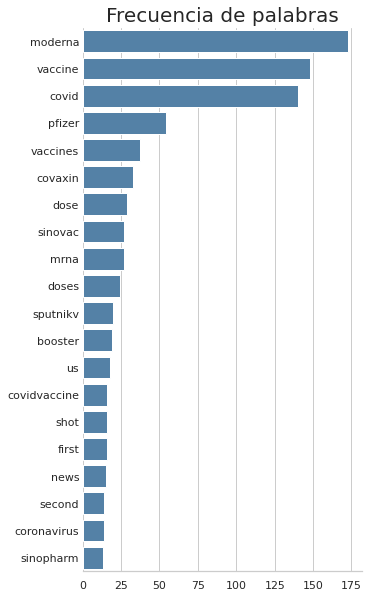

In [ ]:
# Grafica de barras horizontales (Usando Matplotlib)
fig,ax = plt.subplots(figsize = (5,10))

sns.barplot(data = df_50mostcommon, x = "freq", y = "word", color = "steelblue", ax = ax)
ax.tick_params(axis="y", length = 0)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Frecuencia de palabras", size = 20)
sns.despine(left=True)

Dando un resulado en porcentajes de aparición para la palabra moderna y vaccine.


In [ ]:
# Conteo de una palabra y porcentaje de aparición
print(f'{(100 * freq_dist_no_stop_words["moderna"] / len(all_words_except_stop_words)):.3f}%')
print(f'{(100 * freq_dist_no_stop_words["vaccine"] / len(all_words_except_stop_words)):.3f}%')

4.177%
3.573%


Mostramos la gráfica de acumulados y veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes

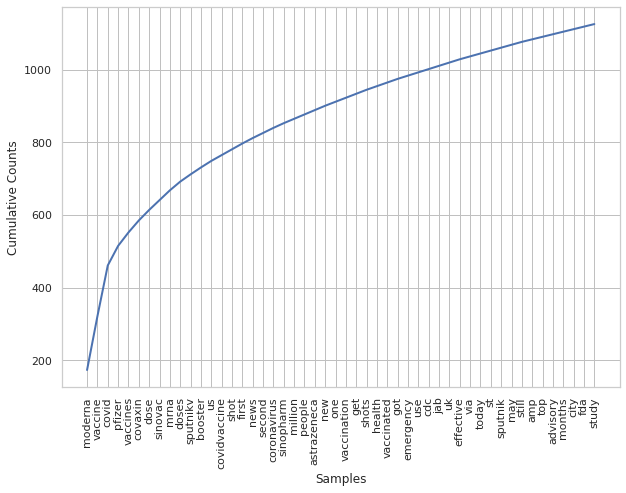

In [ ]:
fig = plt.figure(figsize=(10, 7))
freq_dist_no_stop_words.plot(50, cumulative=True);

Visualizamos las palabras de que mencionan solo una vez

In [ ]:
freq_dist_no_stop_words.hapaxes()[:20]

['brazilian',
 'football',
 'atletico',
 'mineiro',
 'httpstcoejydvhcoah',
 'httpstcoxvumeafnv',
 'ksa',
 'pf',
 'httpstcohocwwnd',
 'fast',
 'furious',
 'tensions',
 'entre',
 'dwayne',
 'vin',
 'diesel',
 'httpstcovrpglqqur',
 'tts',
 'ru',
 'entered']

Realizamos nuestra nubes de palabras y se observa que tantos algunas vacunas como la moderna o pfizer son de las comunes dentro de los intereses de las personas, asi como también la importancia que han tenido el estudio de vacunas para poder contener esta emfermedad.

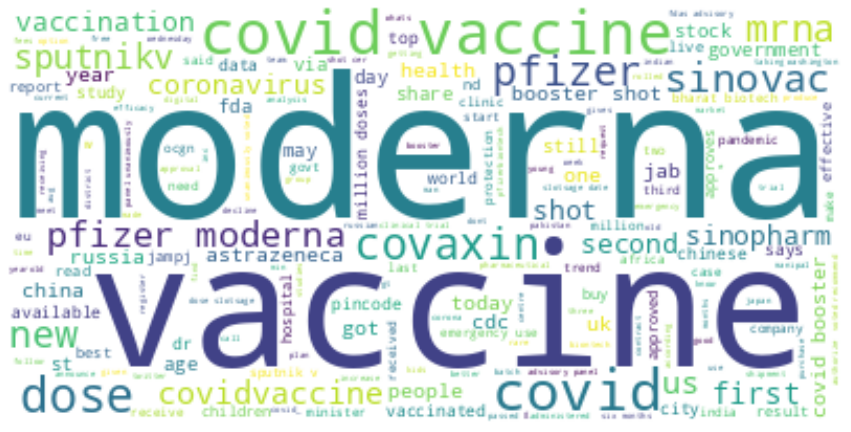

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Postwork 8: Introducción a Machine Learning: Clasificación No Supervisada y Supervisada
Usaremos el algoritmo de clasificacion Supervisado es decir la Regresion Logistica para intentar "predecir" con ella y con los datos que tenemos si un paciente sobrevivira o no. Nuestra variable binaria la sacaremos del registro Fecha de defuncion. 

Procedemos con la importación de las librerías necesarias.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

Limpiaremos nuestro dataframe y puesto que no tenemos una columna de sobreviviente o no, lo intuimos de la columna de fecha de defuncion, quitaremos todos los registros que no tengan los datos completos y solo nos quedaremos con los pacientes infectados con covid.

In [ ]:
df_covid = df.query("CLASIFICACION_FINAL==1 | CLASIFICACION_FINAL==2 | CLASIFICACION_FINAL==3")[['FECHA_DEF', 'NEUMONIA', 'EDAD', 'DIABETES',
                                                                                                 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 
                                                                                                 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
                                                                                                 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO']]

In [ ]:
df_covid_final = df_covid.query("NEUMONIA!=98 & DIABETES!=98 & EPOC!=98 & ASMA!=98 & INMUSUPR!=98 & HIPERTENSION!=98 & OTRA_COM!=98 & CARDIOVASCULAR!=98 & OBESIDAD!=98 & RENAL_CRONICA!=98 & TABAQUISMO!=98 & OTRO_CASO!=98")

Revisamos que solo tengamos los campos que necesitamos.

In [ ]:
df_covid_final.columns

Index(['FECHA_DEF', 'NEUMONIA', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO'],
      dtype='object')

Del campo que queremos convertir a binario identificamos como haremos la conversión, en este caso de los registros '9999-99-99' intuimos que son personas sin fecha de defunción y las identificamos como sobrevivientes con el identificador 1 y los que fallecieron es decir lo que tengan fecha de defunción como 0.

In [ ]:
df_covid_final['FECHA_DEF'].unique()

array(['9999-99-99', '2022-02-21', '2022-01-12', '2022-01-03',
       '2022-01-04', '2022-01-26', '2022-01-08', '2022-02-16',
       '2022-01-11', '2022-01-10', '2022-01-02', '2022-01-13',
       '2022-01-09', '2022-01-07', '2022-01-05', '2022-01-18',
       '2022-01-06', '2022-01-23', '2022-01-14', '2022-01-20',
       '2022-01-16', '2022-01-25', '2022-01-01', '2022-01-19',
       '2022-01-22', '2022-02-02', '2022-01-31', '2022-02-01',
       '2022-01-17', '2022-01-27', '2022-01-29', '2022-01-15',
       '2022-01-24', '2022-01-21', '2022-01-30', '2022-01-28',
       '2022-02-13', '2022-02-11', '2022-02-09', '2022-02-05',
       '2022-02-03', '2022-02-06', '2022-03-04', '2022-02-04',
       '2022-02-07', '2022-02-08', '2023-01-13', '2022-02-15',
       '2022-02-12', '2022-02-22', '2022-03-18', '2022-03-08',
       '2022-02-19', '2022-03-13', '2022-02-20', '2022-02-14',
       '2022-02-23', '2022-02-10', '2022-02-26', '2022-03-05',
       '2022-04-02', '2022-03-09', '2022-03-01', '2022-

In [ ]:
df_covid_final['FECHA_DEF'] = df_covid_final['FECHA_DEF'].apply(lambda x: 1 if x == '9999-99-99' else 0)

<ipython-input-9-be7cf5078358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_final['FECHA_DEF'] = df_covid_final['FECHA_DEF'].apply(lambda x: 1 if x == '9999-99-99' else 0)


Cambiamos el Titulo de la columna por simple coherencia de los datos

In [ ]:
df_covid_final.set_axis(['SOBREVIVIENTE', 'NEUMONIA', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
                         'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
                         'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO'], axis='columns', inplace=True)
df_covid_final.head()

,SOBREVIVIENTE,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
7,1,2,58,2,2,2,2,2,2,2,2,2,2,2
15,1,2,34,2,2,2,2,2,2,2,2,2,2,1
20,1,2,24,2,2,1,2,2,2,2,2,2,2,2
22,0,1,54,2,2,2,2,1,2,2,2,1,2,2
27,1,2,39,2,2,2,2,2,2,2,2,2,2,2


Vemos de los registros con los que vamos a trabajar

In [ ]:
df_covid_final.shape

(1626800, 14)

Dividimos nuestro data frame, separando la columna con variable binaria que será nuestro resultado como Y y el resto de los campos como X

In [ ]:
X = df_covid_final.drop(columns=['SOBREVIVIENTE'])
y = df_covid_final['SOBREVIVIENTE']

Llamamos a la función de regresion logarítmica y definimos el maximo de iteraciones con las que se entrenará el algoritmo

In [ ]:
logreg = LogisticRegression(max_iter=100000)

Dividimos nuestros registros en una proporción de 70/30 para que se entrene nuestro modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Lo entrenamos...

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

Obtenemos nuestra matriz de predicción, probando el modelo con el 30% de los datos restantes.

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
logreg.score(X_test, y_test)

0.9888759118105074

Al calificar nuestro modelo vemos que obtuvo una calificación Muy aceptable pero falta verificar si nuestro modelo aparte de "predecir" si el paciente sobreviviría queremos ver si también logra hacerlo al clasificarlo cómo que fallecerá, para eso procedemos con un analizis más profundo con la Matriz de confusión y posteriormente con la gráfica de ROC/AUC

###**Matriz de confusión**
Obtenemos nuestra matriz de confusión comparando las clasificaciónes predecidas por el modelo con las reales

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[  2067,   3885],
       [  1544, 480544]])

Graficamos nuestra Matriz y confirmamos que en efecto el número de registros clasificados correctamente somos sobrevivientes es muy alto pero el de fallecidos es notablemente muy bajo.

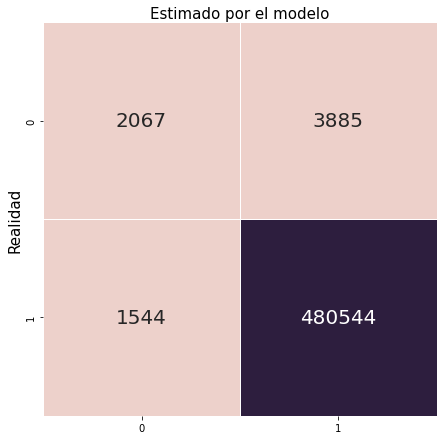

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.cubehelix_palette(as_cmap=True) ,fmt='g', cbar=False, annot_kws={"size": 20},  linewidth=.5)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Obtenemos las métricas de precisión, exactitud, sensibilidad y específicidad del modelo, para confirmar que clasifica bien los que van a sobrevivir o muy mal los que van a fallecer...

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred),"% de las predicciones eran en realidad positivas")
print("Exactitud:",metrics.accuracy_score(y_test, y_pred),"% de las predicciones fueron clasificadas correctamente")
print("Sensibilidad:",metrics.recall_score(y_test, y_pred),"% de las predicciones fueron clasificadas correctamente como positivas")
print("Especificidad:", tn / (tn + fp),"% de las predicciones fueron clasificadas correctamente como negativas")

Precision: 0.9919802489116052 % de las predicciones eran en realidad positivas
Exactitud: 0.9888759118105074 % de las predicciones fueron clasificadas correctamente
Sensibilidad: 0.9967972652295847 % de las predicciones fueron clasificadas correctamente como positivas
Especificidad: 0.3472782258064516 % de las predicciones fueron clasificadas correctamente como negativas


###**Curva ROC / AUC**
Ahora graficamos la sensibilidad que tiene el modelo en verdaderos positivos y falsos positivos y de antemano sabemos por la matriz de confusión que nuestro modelo predice bien positivamente pero no negativamente. Obtenemos las probabilidades de positivos y negativos

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[5.23825329e-04, 9.99476175e-01],
       [6.61991382e-04, 9.99338009e-01],
       [5.66339232e-04, 9.99433661e-01],
       [7.99338200e-03, 9.92006618e-01],
       [1.05713960e-03, 9.98942860e-01],
       [5.50184036e-03, 9.94498160e-01],
       [4.84501308e-04, 9.99515499e-01],
       [1.33578654e-03, 9.98664213e-01],
       [5.23825329e-04, 9.99476175e-01],
       [2.13227058e-03, 9.97867729e-01]])

Obtenemos los valores de nuestra gráfica y posteriormente graficamos

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

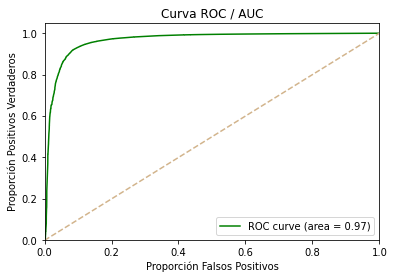

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='tan', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Falsos Positivos')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

###Conclusión
Con esto obtenemos que nuestro modelo clasifica altamente correcto cuando el paciente sobrevivirá pero muy mal cuando clasifica si esté fallecerá.

En interpretación a nuestro caso de estudio podemos deducir con este modelo que los campos elegidos para encontrar un patron son las enfermedades adicionales al Covid los cuales podrían complicar la recuperación del paciente, al menos con el dataset mayoritariamente categorico que tenemos no podemos predecir si nuestro paciente morirá, intuimos que si los registro de cada enfermadad fueran datos numéricos, en donde se diera una metrica de sus estudios clinicos de cada enfermedad o los niveles de anticuerpos que tiene el paciente, el modelo podría funcionar mejor.

#Conclusiones
Ahora que hemos estudiado diferentes temas sobre análisis de datos encaminados hacia la aplicación de Machine Learning, nos hemos dado cuenta que para realizar análisis profundos, manipulación, transformación y extracción de información de bases de datos que respondan a preguntas de problemas reales, requerimos de un dataset que esté bien estructurado de tal manera que tenga varias variables numéricas y otras categóricas y así obtener insights y generar múltiples visualizaciones que permitan comunicar diferentes conclusiones sobre la naturaleza y comportamiento de los datos.<br><br>
En nuestro caso, el dataset elegido en el módulo pasado, casi todas las variables eran categóricas, por lo que tuvimos que aplicar agrupaciones y obtener subconjuntos de tal manera que se adaptaran a las necesidades de los ejercicios, a pesar de las complicaciones, logramos aplicar los temas aprendidos durante el módulo.

